In [1]:
from queue import PriorityQueue
from queue import Queue
from queue import LifoQueue



#Breadth-first Search
def BFS(given_state , n): #n is the size of the puzzle
    root = State(given_state, None, None, 0, 0) #create the root node
    if root.test(): #check if the root is the goal
        return root.solution()
    frontier = Queue() #create the frontier
    frontier.put(root) #put the root in the frontier
    explored = []

    while not(frontier.empty()): #while the frontier is not empty
        current_node = frontier.get() #get the first node in the frontier
        explored.append(current_node.state) #add the current node to the explored list

        children = current_node.expand(n) #expand the current node
        for child in children:
            if child.state not in explored: #if the child is not in the explored list
                if child.test():
                    return child.solution(), len(explored)
                frontier.put(child)
    return

#Uniform Cost Search
def UCS(given_state , n):
    frontier = PriorityQueue() #create the frontier
    explored = []
    counter = 0
    root = State(given_state, None, None, 0, 0) #create the root node
    frontier.put((root.cost, counter, root)) #put the root in the frontier

    while not frontier.empty(): #while the frontier is not empty
        current_node = frontier.get()
        current_node = current_node[2] #get the first node in the frontier
        explored.append(current_node.state) #add the current node to the explored list

        if current_node.test():
            return current_node.solution(), len(explored) #return the solution

        children = current_node.expand(n) #expand the current node
        for child in children:
            if child.state not in explored:
                counter += 1
                frontier.put((child.cost, counter, child))
    return

    #Iterative Deepening Search
def IDS(given_state , n): #Iterative Deepening Search
    root = State(given_state, None, None, 0, 0) #create the root node
    if root.test():
        return root.solution() #check if the root is the goal
    for depth in range(30):
        frontier = LifoQueue() #create the frontier
        frontier.put(root)
        explored = []

        while not(frontier.empty()): #while the frontier is not empty
            current_node = frontier.get()
            max_depth = current_node.depth #current depth
            explored.append(current_node.state)

            if max_depth == depth:
                continue #go to the next branch

            children = current_node.expand(n) #expand the current node
            for child in children:
                if child.state not in explored: #if the child is not in the explored list
                    if child.test():
                        return child.solution(), len(explored)
                    frontier.put(child)
    return (("Couldn't find solution in the limited depth."), len(explored))

#Depth-first Search without limited
def DFS_without_limited(given_state , n):
    root = State(given_state, None, None, 0, 0)    #create the root node
    if root.test():
        return root.solution()
    frontier = LifoQueue()
    frontier.put(root)
    explored = []

    while not(frontier.empty()):
        current_node = frontier.get()
        explored.append(current_node.state) #add the current node to the explored list
 
        children = current_node.expand(n)
        for child in children:
            if child.state not in explored:
                if child.test():
                    return child.solution(), len(explored)
                frontier.put(child)
    return (("Couldn't find solution in the limited depth."), len(explored))

#Depth-first Search with limited depth
def DFS(given_state , n):
    root = State(given_state, None, None, 0, 0) #create the root node
    if root.test():
        return root.solution()
    frontier = LifoQueue()
    frontier.put(root)
    explored = []

    while not(frontier.empty()):
        current_node = frontier.get() #get the first node in the frontier
        max_depth = current_node.depth #current depth
        explored.append(current_node.state)

        if max_depth == 30:
            continue #go to the next branch
 
        children = current_node.expand(n) #expand the current node
        for child in children:
            if child.state not in explored:
                if child.test():
                    return child.solution(), len(explored)
                frontier.put(child)
    return (("Couldn't find solution in the limited depth."), len(explored))



def Greedy(given_state , n): #Greedy Best First Search
    frontier = PriorityQueue() #create the frontier
    explored = []
    counter = 0
    root = State(given_state, None, None, 0, 0)
    #root.evaluation()
    evaluation = root.Manhattan_Distance(n) #we can use Misplaced_Tiles() instead.
    frontier.put((evaluation[0], counter, root)) #based on greedy evaluation

    while not frontier.empty():
        current_node = frontier.get()
        current_node = current_node[2]
        explored.append(current_node.state)

        if current_node.test():
            return current_node.solution(), len(explored)

        children = current_node.expand(n)
        for child in children:
            if child.state not in explored:
                counter += 1
                evaluation = child.Manhattan_Distance(n) #we can use Misplaced_Tiles() instead.
                frontier.put((evaluation[0], counter, child)) #based on greedy evaluation
    return


def AStar_search(given_state , n):
    frontier = PriorityQueue()
    explored = []
    counter = 0
    root = State(given_state, None, None, 0, 0)
    evaluation = root.Manhattan_Distance(n) #we can use Misplaced_Tiles() instead.
    frontier.put((evaluation[1], counter, root)) #based on A* evaluation

    while not frontier.empty():
        current_node = frontier.get()
        current_node = current_node[2] #get the first node in the frontier
        explored.append(current_node.state)

        if current_node.test(): #check if the root is the goal
            return current_node.solution(), len(explored) #return the solution

        children = current_node.expand(n) #expand the current node
        for child in children:
            if child.state not in explored:
                counter += 1
                evaluation = child.Manhattan_Distance(n) #we can use Misplaced_Tiles() instead.
                frontier.put((evaluation[1], counter, child)) #based on A* evaluation
    return

In [2]:
class State:
    goal = []
    greedy_evaluation = None
    AStar_evaluation = None
    heuristic = None
    def __init__(self, state, parent, direction, depth, cost):
        self.state = state
        self.parent = parent
        self.direction = direction
        self.depth = depth
        l_n = len(state)
        if l_n == 9:
            self.goal = [1,2,3,4,5,6,7,8,0]
        elif l_n == 16:
            self.goal = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,0]
        elif l_n == 25:
            self.goal = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,0]
            
        if parent:
            self.cost = parent.cost + cost

        else:
            self.cost = cost

            
            
    def test(self): #check if the given state is goal
        if self.state == self.goal:
            return True
        return False
        
    #heuristic function based on Manhattan distance
    def Manhattan_Distance(self ,n): 
        self.heuristic = 0
        for i in range(1 , n*n):
            distance = abs(self.state.index(i) - self.goal.index(i))
            
            #manhattan distance between the current state and goal state
            self.heuristic = self.heuristic + distance/n + distance%n

        self.greedy_evaluation = self.heuristic    
        self.AStar_evaluation = self.heuristic + self.cost
        
        return( self.greedy_evaluation, self.AStar_evaluation)


    #heuristic function based on number of misplaced tiles
    def Misplaced_Tiles(self,n): 
        counter = 0;
        self.heuristic = 0
        for i in range(n*n):
            for j in range(n*n):
                if (self.state[i] != self.goal[j]):
                    counter += 1
                self.heuristic = self.heuristic + counter

        self.greedy_evaluation = self.heuristic    
        self.AStar_evaluation = self.heuristic + self.cost

        return( self.greedy_evaluation, self.AStar_evaluation)                
                    


    @staticmethod
    
    #this would remove illegal moves for a given state
    def available_moves(x,n): 
        moves = ['Left', 'Right', 'Up', 'Down']
        if x % n == 0:
            moves.remove('Left')
        if x % n == n-1:
            moves.remove('Right')
        if x - n < 0:
            moves.remove('Up')
        if x + n > n*n - 1:
            moves.remove('Down')

        return moves

    #produces children of a given state
    def expand(self , n): 
        x = self.state.index(0)
        moves = self.available_moves(x,n)
        
        children = []
        for direction in moves:
            temp = self.state.copy()
            if direction == 'Left':
                temp[x], temp[x - 1] = temp[x - 1], temp[x]
            elif direction == 'Right':
                temp[x], temp[x + 1] = temp[x + 1], temp[x]
            elif direction == 'Up':
                temp[x], temp[x - n] = temp[x - n], temp[x]
            elif direction == 'Down':
                temp[x], temp[x + n] = temp[x + n], temp[x]
        
        
            children.append(State(temp, self, direction, self.depth + 1, 1)) #depth should be changed as children are produced
        return children

    
    #gets the given state and returns it's direction + it's parent's direction till there is no parent
    def solution(self):
        solution = []
        solution.append(self.direction)
        path = self
        while path.parent != None:
            path = path.parent
            solution.append(path.direction)
        solution = solution[:-1]
        solution.reverse()
        return solution

In [3]:
#initial state

#count the number of inversions       
def inv_num(puzzle): #count the number of inversions
    inv = 0
    for i in range(len(puzzle)-1): #for each element in the list
        for j in range(i+1 , len(puzzle)): #for each element after the current element
            if (( puzzle[i] > puzzle[j]) and puzzle[i] and puzzle[j]): #if the current element is greater than the next element and neither are 0
                inv += 1
    return inv

def solvable(puzzle): #check if initial state puzzle is solvable: number of inversions should be even.
    inv_counter = inv_num(puzzle) #count the number of inversions
    if (inv_counter %2 ==0): #if the number of inversions is even
        return True
    return False


#1,8,2,0,4,3,7,6,5 is solvable
#2,1,3,4,5,6,7,8,0 is not solvable

from time import time
import random


n_inputs = list(map(lambda x: int(x), input().split()))
bfs_times = [0]
dfs_times = [0]
greedy_times = [0]
a_star_times = [0]
ucs_times = [0]
ids_times = [0]
dfswol_times = [0]

for n in n_inputs:
    root = random.sample(range(0, n*n), n*n)
    
    while not solvable(root):
        root = random.sample(range(0, n*n), n*n)
        
    # burayı silince random çalışıyor
    if n == 3:
        root = [1,2,3,4,5,6,7,0,8]
    if n == 4:
        root = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,0,15]
    if n == 5:
        root = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,0,24]
        
    # 
        
    print("Solvable, please wait. \n")
    print(root)

    time1 = time()
    BFS_solution = BFS(root, n)
    BFS_time = time() - time1
    print('BFS Solution is ', BFS_solution[0])
    print('Number of explored nodes is ', BFS_solution[1])    
    print('BFS Time:', BFS_time , "\n")
    bfs_times.append(BFS_time)

    time2 = time()
    DFS_solution = DFS(root, n)
    DFS_time = time() - time2
    print('DFS Solution is ', DFS_solution[0])
    print('Number of explored nodes is ', DFS_solution[1])
    print('DFS Time:', DFS_time, "\n")
    dfs_times.append(DFS_time)

    time3 = time()
    Greedy_solution = Greedy(root, n)
    Greedy_time = time() - time3
    print('Greedy Solution is ', Greedy_solution[0])
    print('Number of explored nodes is ', Greedy_solution[1])   
    print('Greedy Time:', Greedy_time , "\n")
    greedy_times.append(Greedy_time)

    time4 = time()
    AStar_solution = AStar_search(root, n)
    AStar_time = time() - time4
    print('A* Solution is ', AStar_solution[0])
    print('Number of explored nodes is ', AStar_solution[1])   
    print('A* Time:', AStar_time , "\n")
    a_star_times.append(AStar_time)
    
    time5 = time()
    UCS_solution = UCS(root, n)
    UCS_time = time() - time5
    print('UCS Solution is ', UCS_solution[0])
    print('Number of explored nodes is ', UCS_solution[1])
    print('UCS Time:', UCS_time , "\n")
    ucs_times.append(UCS_time)
    
    
    time6 = time()
    IDS_solution = IDS(root, n)
    IDS_time = time() - time6
    print('IDS Solution is ', IDS_solution[0])
    print('Number of explored nodes is ', IDS_solution[1])
    print('IDS Time:', IDS_time , "\n")
    ids_times.append(IDS_time)
        
    time7 = time()
    DFSWOL = DFS_without_limited(root, n)
    DFSWOL_time = time() - time7
    print('DFSWOL Solution is ', DFSWOL[0])
    print('Number of explored nodes is ', DFSWOL[1])
    print('DFSWOL Time:', DFSWOL_time , "\n")
    dfswol_times.append(DFSWOL_time)
    
n_inputs.insert(0, 0)

3 4 5
Solvable, please wait. 

[1, 2, 3, 4, 5, 6, 7, 0, 8]
BFS Solution is  ['Right']
Number of explored nodes is  1
BFS Time: 0.0 

DFS Solution is  ['Right']
Number of explored nodes is  1
DFS Time: 0.0 

Greedy Solution is  ['Right']
Number of explored nodes is  2
Greedy Time: 0.0 

A* Solution is  ['Right']
Number of explored nodes is  2
A* Time: 0.0 

UCS Solution is  ['Right']
Number of explored nodes is  3
UCS Time: 0.0010318756103515625 

IDS Solution is  ['Right']
Number of explored nodes is  1
IDS Time: 0.0 

DFSWOL Solution is  ['Right']
Number of explored nodes is  1
DFSWOL Time: 0.0009987354278564453 

Solvable, please wait. 

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 0, 15]
BFS Solution is  ['Right']
Number of explored nodes is  1
BFS Time: 0.0 

DFS Solution is  ['Right']
Number of explored nodes is  1
DFS Time: 0.0 

Greedy Solution is  ['Right']
Number of explored nodes is  2
Greedy Time: 0.0009772777557373047 

A* Solution is  ['Right']
Number of explored nodes 

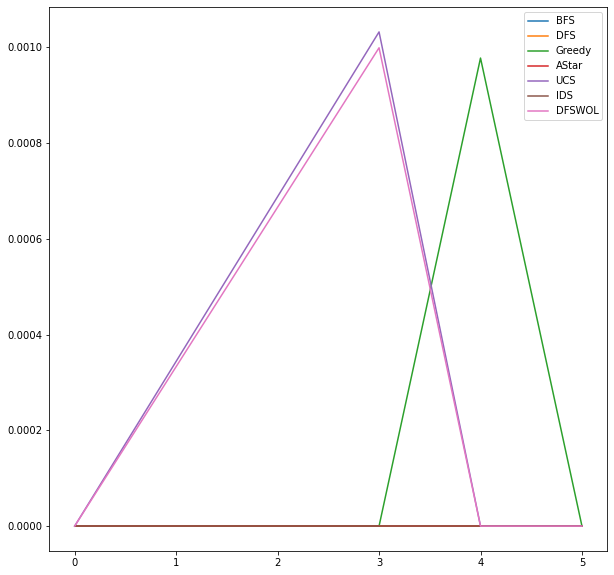

In [4]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10,10))
#plt.ylim([0,0.01])

plt.plot(n_inputs, bfs_times, label='BFS')
plt.plot(n_inputs, dfs_times, label='DFS')
plt.plot(n_inputs, greedy_times, label='Greedy')
plt.plot(n_inputs, a_star_times, label='AStar')
plt.plot(n_inputs, ucs_times, label='UCS')
plt.plot(n_inputs, ids_times, label='IDS')
plt.plot(n_inputs, dfswol_times, label='DFSWOL')


plt.legend()
plt.show()